In [ ]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=9ebe5c5c90f1779767130703fb3b8caafc9d23262d28197f5936aa63ee3b422d
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [ ]:
# Step 2: データ読み込み & 基本操作

# pandas（パンダス）ライブラリを読み込む
import pandas as pd

# 2-1：csvファイルを読み込んでdfに代入
df = pd.read_csv('sales.csv')

# 先頭から5行目までのデータを表示
df.head()

,date,weather,customers,ad_cost,sales
0,2024/1/1,sunny,120,1000,30000
1,2024/1/2,rainy,80,500,21000
2,2024/1/3,sunny,150,2000,40000
3,2024/1/4,cloudy,110,800,25000
4,2024/1/5,rainy,60,400,19000


In [ ]:
# 2-2：データの概要を見て、欠損がないか確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       121 non-null    object
 1   weather    121 non-null    object
 2   customers  121 non-null    int64 
 3   ad_cost    121 non-null    int64 
 4   sales      121 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.9+ KB


In [ ]:
# 2-3：指定した列の統計情報の確認
df[['customers',	'ad_cost',	'sales']].describe()

,customers,ad_cost,sales
count,121.000000,121.000000,121.000000
mean,108.512397,764.462810,22355.371901
std,27.253781,190.988439,5917.290349
min,50.000000,400.000000,13000.000000
25%,90.000000,700.000000,18000.000000
50%,110.000000,700.000000,21000.000000
75%,130.000000,900.000000,27000.000000
max,160.000000,2000.000000,40000.000000


In [ ]:
# 2-4：日付の変換

# date（日付）列を、日付を扱う「datetime型」に変換
df['date'] = pd.to_datetime(df['date'])
print(type((df['date']).loc[0])) # 日付の1行目を取り出して型を表示

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# 2-5：グループ化 (groupby)で天気別の平均売上を出す
grouped = df.groupby('weather')['sales'].mean().reset_index()  # weather列の種類でグループ化して、平均売上を出す
print(grouped)


  weather         sales
0  cloudy  20307.692308
1   rainy  16948.717949
2   sunny  29116.279070


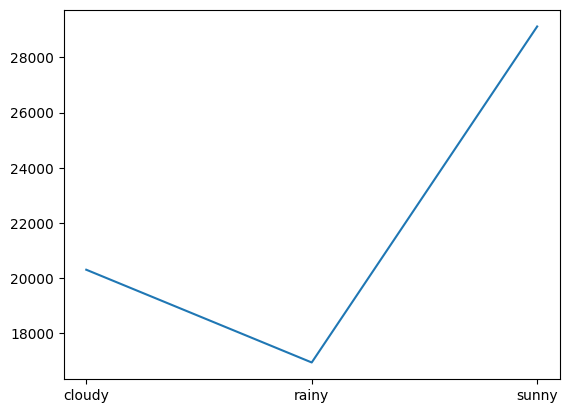

In [ ]:
# 2-6：簡単な折れ線グラフを描画（matplotlib）
import matplotlib.pyplot as plt # グラフを描画するためのライブラリをインポート

# X軸：グループ化した天気（weather）、Y軸：それぞれの天気の売上平均（sales）
plt.plot(grouped['weather'], grouped['sales'])
plt.show() # 画像を表示

In [ ]:
# Step 3: 特徴量エンジニアリング

# 3-1：天気をダミー変数化（pd.get_dummies）し、customers や ad_cost と一緒に特徴量として使える形にする

# weather列をダミー変数化します。該当の時に「1」、そうでない時は「0」と整数で表す
weather_dummies = pd.get_dummies(df['weather'], dtype=int)
print(weather_dummies)

     cloudy  rainy  sunny
0         0      0      1
1         0      1      0
2         0      0      1
3         1      0      0
4         0      1      0
..      ...    ...    ...
116       0      0      1
117       0      0      1
118       0      1      0
119       0      1      0
120       0      0      1

[121 rows x 3 columns]


In [ ]:
# 3-2：元のデータに天気のダミー変数を横方向に結合する
df = pd.concat([df, weather_dummies], axis=1) # ！注意！何回も押さない
print(df)

          date weather  customers  ad_cost  sales  cloudy  rainy  sunny
0   2024-01-01   sunny        120     1000  30000       0      0      1
1   2024-01-02   rainy         80      500  21000       0      1      0
2   2024-01-03   sunny        150     2000  40000       0      0      1
3   2024-01-04  cloudy        110      800  25000       1      0      0
4   2024-01-05   rainy         60      400  19000       0      1      0
..         ...     ...        ...      ...    ...     ...    ...    ...
116 2024-04-26   sunny        140      700  26000       0      0      1
117 2024-04-27   sunny        120      700  25000       0      0      1
118 2024-04-28   rainy         70      700  19000       0      1      0
119 2024-04-29   rainy         90      700  18000       0      1      0
120 2024-04-30   sunny        130      700  29000       0      0      1

[121 rows x 8 columns]


In [ ]:
# Step 4: 学習データとテストデータの分割

# 4-1：機械学習の予測モデルにインプットするデータX「説明変数」と、予測値として出力するデータy「目的変数」に列を分ける
# 与えるデータ）X：来客数、広告費、天気3種
X = df[['customers', 'ad_cost', 'cloudy', 'rainy', 'sunny']]
# 予測する値）y：売上
y = df['sales']

# データを分割するための関数をインポート
from sklearn.model_selection import train_test_split

# 4-2：Xとyをそれぞれ、学習データ(train)7 と テストデータ3に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
# random_state を固定すると毎回同じ分割結果になる
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(84, 5) (37, 5) (84,) (37,)


In [ ]:
# ☆Step 5: 複数モデルで学習

# 5-1線形回帰 (LinearRegression)：のモデルインポート
from sklearn.linear_model import LinearRegression
  # 5-2：ランダムフォレスト (RandomForestRegressor)：のモデルインポート
from sklearn.ensemble import RandomForestClassifier
  # 5-3：K近傍回帰 (KNeighborsRegressor)：のモデルインポート
from sklearn.neighbors import KNeighborsRegressor

# モデルの予測を評価するための関数をインポート（決定係数、平均二乗誤差 MSE）
from sklearn.metrics import r2_score, mean_squared_error

results = [] # 後で表にするため、データ格納用のリストを用意


# ☆Step 6: モデルの評価

# ①線形回帰
line = LinearRegression()          # 各モデルのインスタンスを作成
line.fit(X_train, y_train)         # 学習データで学習を実行
y_pred = line.predict(X_test)      # テストデータを使って予測

mean_squared_error(y_test, y_pred) # テストデータの売上値と、予測した売上値から平均二乗誤差 MSE を計算
r2_score(y_test, y_pred)           # テストデータの売上値と、予測した売上値から決定係数を計算
results.append(['線形回帰：', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred),])
# リストに、「モデル名、平均二乗誤差 MSE、決定係数の値」を格納

# ②ランダムフォレスト
rf =  RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
results.append(['RandomForest　　　　：', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred),])

# ③K近傍回帰
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
results.append(['K近傍回帰：', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred),])


#　resultsリストを表にする。（'Model', 'MSE', 'R²'は列名）
df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])
print(df_results)

# 過学習確認
# print("線形回帰：学習データでの決定係数 :",line.score(X_train, y_train))
# print("線形回帰：テストデータでの決定係数 :",line.score(X_test, y_test))
# print("RF:学習データでの決定係数 :",rf.score(X_train, y_train))
# print("RF:テストデータでの決定係数 :",rf.score(X_test, y_test))
# print("K近傍回帰：学習データでの決定係数 :",knr.score(X_train, y_train))
# print("K近傍回帰：テストデータでの決定係数 :",knr.score(X_test, y_test))

               Model           MSE        R²
0              線形回帰：  6.765134e+06  0.768301
1  RandomForest　　　　：  6.135135e+06  0.789878
2             K近傍回帰：  1.009405e+07  0.654289
線形回帰：学習データでの決定係数 : 0.7912926388355275
線形回帰：テストデータでの決定係数 : 0.76830108458621
RF:学習データでの決定係数 : 0.6666666666666666
RF:テストデータでの決定係数 : 0.2972972972972973
K近傍回帰：学習データでの決定係数 : 0.7948253676470588
K近傍回帰：テストデータでの決定係数 : 0.6542890023016111


In [ ]:
#Step 7: 簡易システム化：「来客数」「広告費」「天気」を入力すると売上を予測する関数を作る

# 線形回帰で使うデータを求める
print(f"傾き：{line.coef_}")      # 傾きを求める
print(f"切片：{line.intercept_}") # 切片を求める
print(f"{X.columns}")       # 傾きの項目を確認

傾き：[ 2.47012119e+01  5.18450460e+00 -1.63973003e+03 -4.14920844e+03
  5.78893847e+03]
切片：15773.428117583526
Index(['customers', 'ad_cost', 'cloudy', 'rainy', 'sunny'], dtype='object')


In [ ]:
# 入力値から売り上げを予測
def predict_sales():
  customers = int(input("来客数"))
  ad_cost   = int(input("広告費"))
  cloudy    = int(input("曇りcloudyなら1、それ以外なら0を入力"))
  rainy     = int(input("雨rainyなら1、それ以外なら0を入力"))
  sunny     = int(input("晴れsunnyなら1、それ以外なら0を入力"))

#　傾きや切片を用いて売上を予測
  y_pred = (line.coef_[0] * customers + line.coef_[1] * ad_cost
            + line.coef_[2] * cloudy + line.coef_[3] * rainy + line.coef_[4] * sunny + line.intercept_)

  print(f"売上予測：{y_pred}円")

predict_sales()

来客数150
広告費1000
曇りcloudyなら1、それ以外なら0を入力0
雨rainyなら1、それ以外なら0を入力0
晴れsunnyなら1、それ以外なら0を入力1
売上予測：30452.05297255861円
